## Oasis Infobyte - OIBSIP - Data Science - April Phase 1¶
## TASK 3: CAR PRICE PREDICTION WITH MACHINE LEARNING
## Problem Statement:

The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project is for you.

## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
Data=pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv")

In [3]:
Data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
Data.columns


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
Data.isnull().sum()   #Checking null values

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
Data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [7]:
#Divide the dataset into attributes and labels. In our dataset price is the target variable.

X=Data.drop(["fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","fuelsystem","enginetype","cylindernumber"],axis = 1)
y = Data.iloc[:,-1].values

In [8]:
print(Data.corr())

                    car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm          -0.203789   0.273606  -0.360469  -

In [9]:
#Divide the dataset into attributes and labels. In our dataset price is the target variable.

X=Data.drop(["CarName","fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","fuelsystem","enginetype","cylindernumber"],axis = 1)
y = Data.iloc[:,-1].values


In [10]:
#Splitting the data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .20,random_state = 0)


## Making prediction

In [11]:
X_train.shape


(164, 16)

In [12]:
X_test.shape

(41, 16)

In [13]:
y_train.shape

(164,)

In [14]:
y_test.shape

(41,)

In [28]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [29]:
pred = model.predict(X_test)

In [30]:
y_train_pred = regressor.predict(X_train)

In [31]:
y_test_pred = regressor.predict(X_test)

In [32]:
#Comparing actual and predicted values

data = pd.DataFrame({"Actual" : y_test,"Predicted" : y_test_pred})
data.head()

,Actual,Predicted
0,6795.0,6795.0
1,15750.0,15750.0
2,15250.0,15250.0
3,5151.0,5151.0
4,9995.0,9995.0


In [51]:
print('residual sum of squares',np.sum(Data['price']-regressor.predict(X))**2)

residual sum of squares 6.21014116680311e-20


In [49]:
#Evaluating the model

print('MAE:',metrics.mean_absolute_error(y_train,y_train_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))
print('R_squared:',metrics.r2_score(y_train,y_train_pred))

MAE: 2.783941099329329e-12
RMSE: 3.5438711481911904e-12
R_squared: 1.0


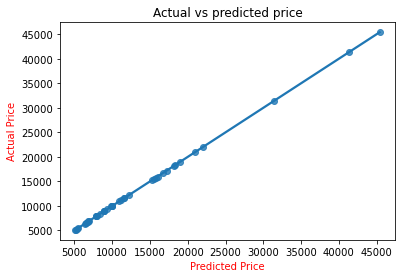

In [50]:
import seaborn as sns
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price",color="red")
plt.ylabel('Actual Price',color="red")
plt.title("Actual vs predicted price")

plt.show()
     